In [ ]:
CRIM：人均犯罪率
ZN：25,000平方英尺以上民用土地的比例
INDUS：城鎮非零售業商用土地比例
CHAS：是否鄰近查爾斯河，1是鄰近，0是不鄰近
NOX：一氧化氮濃度（千萬分之一）
RM：住宅的平均房間數
AGE：自住且建於1940年前的房屋比例
DIS：到5個波士頓就業中心的加權距離
RAD：到高速公路的便捷度指數
TAX：每萬元的房產稅率
PTRATIO：城鎮學生教師比例
B： 1000(Bk − 0.63)2 其中Bk是城鎮中黑人比例
LSTAT：低收入人群比
MEDV：自住房中位數價格，單位是千元

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
df = pd.DataFrame(boston["data"],columns = boston["feature_names"])
df["ans"] = boston["target"]
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,ans
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [5]:
from sklearn.model_selection import train_test_split
#[90%題目, 10%題目, 90%答案, 10%答案]
x_train, x_test, y_train, y_test = train_test_split(boston["data"],
                boston["target"],
                test_size=0.1) #10%作為測試

In [6]:
#選擇學習方式
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=6) #預設樹的深度為6

In [7]:
reg.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [8]:
#驗證模型
from sklearn.metrics import r2_score
pre = reg.predict(x_test)
print("預測:",list(pre))
print("正確:",list(y_test))
print("R2 score:",r2_score(y_test,pre))

預測: [16.76, 22.45684210526315, 20.053333333333335, 9.107142857142858, 20.053333333333335, 26.18846153846154, 9.107142857142858, 22.45684210526315, 22.45684210526315, 33.4, 12.033333333333333, 13.436363636363636, 50.0, 14.728571428571428, 22.45684210526315, 22.45684210526315, 9.107142857142858, 9.107142857142858, 26.18846153846154, 20.053333333333335, 14.728571428571428, 12.033333333333333, 20.053333333333335, 22.45684210526315, 16.76, 34.61249999999999, 26.18846153846154, 15.23, 22.45684210526315, 20.053333333333335, 13.436363636363636, 20.053333333333335, 22.45684210526315, 22.45684210526315, 9.107142857142858, 12.033333333333333, 42.3, 9.107142857142858, 22.45684210526315, 20.053333333333335, 22.208333333333332, 34.61249999999999, 22.208333333333332, 12.545454545454545, 12.545454545454545, 22.45684210526315, 13.436363636363636, 39.25, 22.45684210526315, 22.45684210526315, 22.45684210526315]
正確: [15.6, 23.9, 20.9, 8.8, 21.7, 30.1, 7.0, 24.4, 21.2, 31.7, 10.9, 12.0, 48.5, 20.1, 20.5, 1

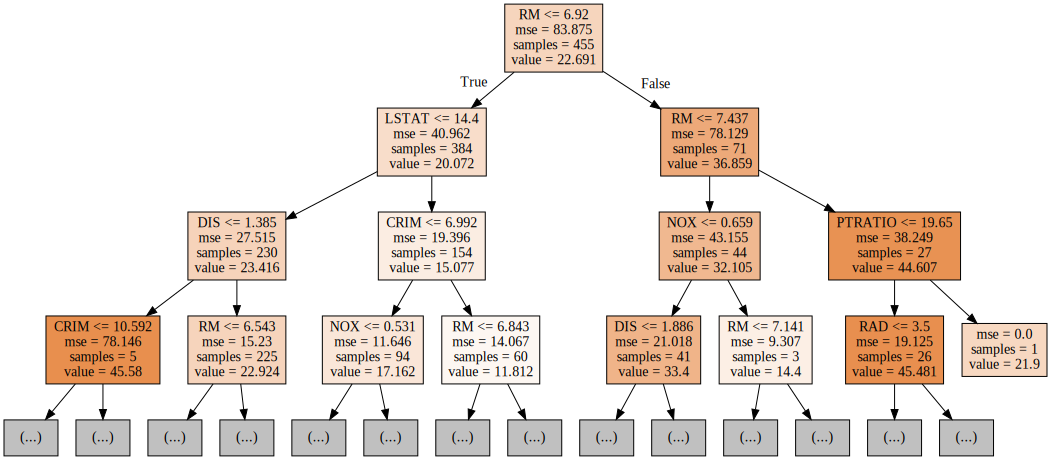

In [10]:
#安裝graphviz -> 設定環境變數到graphviz/bin -> install packages "graphviz"
from sklearn.tree import export_graphviz
import graphviz
g = export_graphviz(reg, feature_names=boston["feature_names"],
                    max_depth=3, #預設樹的深度為3
                   filled=True) #顏色
graphviz.Source(g)
